In [18]:
from IPython.display import display, Math, Latex

print('Lane-Emden Equation:')
display(Latex(r'$'\
              r'\dfrac{\text{d}}{\text{d}z}'\
              r'\left(z^2 \dfrac{\text{d}W(z)}{\text{d}z}\right)'\
              r'='\
              r'-z^2W^n(z)'\
              r'$'))

print("Separation of equations:")
display(Latex(r'$'\
              r'f_{1}'\
              r'='\
              r'z^2'\
              r'\dfrac{dW(z)}{dz}'\
              r'$'))
display(Latex(r'$'\
              r'W(z)'\
              r'='\
              r'\int f_{1}\frac{1}{z^2}dz'\
              r'$'))

Lane-Emden Equation:


<IPython.core.display.Latex object>

Separation of equations:


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

_______________________________
Valeu of Zn for n= 0.0


[[2.4489999999998413]]

_______________________________
Valeu of Zn for n= 1.0


[[3.140999999999765], [6.283000000000433], [9.424000000000216]]

_______________________________
Valeu of Zn for n= 1.5


[[3.6539999999997086]]

M = 1.9739330211095758e+30
_______________________________
Valeu of Zn for n= 3.0


[[6.900000000000639]]

M = 4.345470652753064e+29
_______________________________


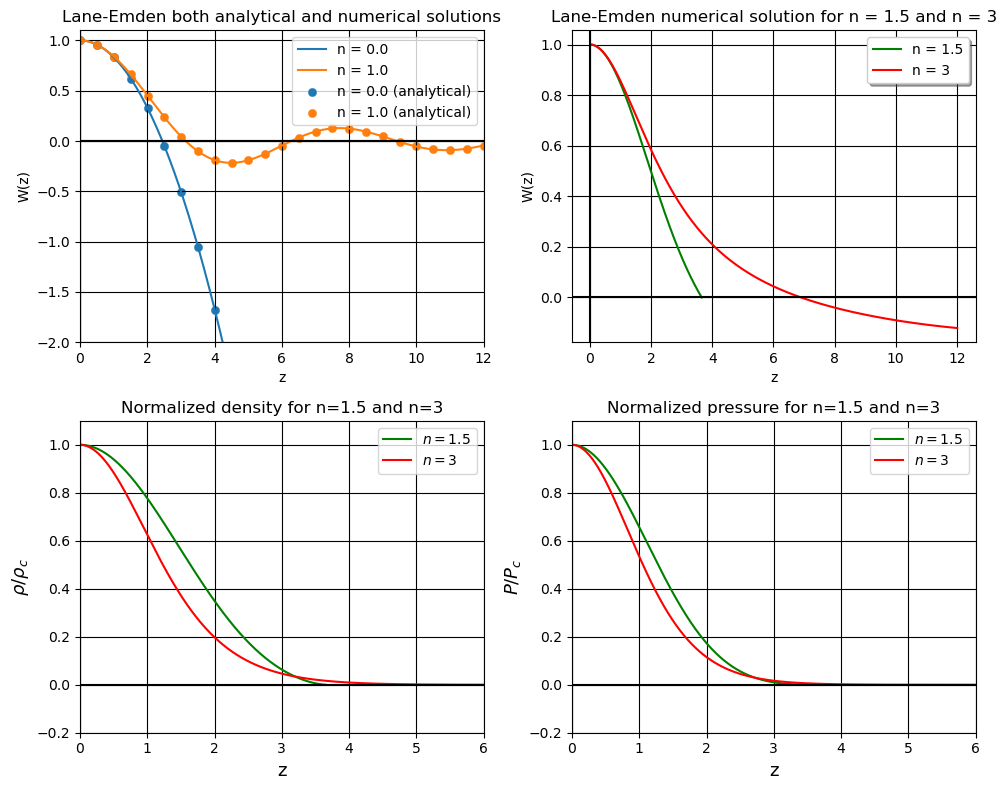

In [19]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
    
dzi = 0.001
N = 12000
G = 6.67408e-8   #dyne.(cm/g)^2

fig, axs = plt.subplots(2, 2, figsize=(10, 8))

for n in np.arange(0,4,0.5):   
    zi = 0.01
    w = 1.0
    f1 = 0.0
    f = 0.0   #P/P_c
    e = 0.0   #rho/rho_c
    w_sol = []
    zi_sol = []
    w_rho = [] 
    w_p = []
    root = []
    if n == 0 or n == 1:
        for i in range (N):
            f1 += -zi**2*w**(n)*dzi
            w += f1/zi**2*dzi
            zi += dzi
            w_sol.append(w)
            zi_sol.append(zi)
            if (w_sol[i]<0 and w_sol[i-1]>=0):  #finding roots (Zn)
                root.append([zi])
            if (w_sol[i]>0 and w_sol[i-1]<=0):
                root.append([zi])
                
        #Analitycal solution graph for n=0 and n=1:
        axs[0, 0].plot(zi_sol, w_sol, label = 'n = '+str(n))
        axs[0, 0].axhline(y=0,c='black')
        axs[0, 0].axvline(x=0,c='black')
        axs[0, 0].set_title('Lane-Emden both analytical and numerical solutions')
        axs[0, 0].set_xlim(0,12)
        axs[0, 0].set_ylim(-2,1.1)
        axs[0, 0].set_xlabel('z')
        axs[0, 0].set_ylabel('W(z)')
        axs[0, 0].grid(color = 'black')
        axs[0, 0].legend(shadow=True)
        axs[0, 0].legend()
        
        print('_______________________________')

        print('Valeu of Zn for n=',n)
        display(root) #Values of Zn (n, Zn) 
#------------------------------------------------------------------------------------------------------------------------------#
    if n==1.5:
        for i in range (N):
            if w>=0:
                e = w**(n)
                f = w**(n+1)
                f1 += -zi**2*w**(n)*dzi
                w += f1/zi**2*dzi
                zi += dzi
                w_rho.append([e])
                w_p.append([f])
                w_sol.append(w)
                zi_sol.append(zi)
                if (w_sol[i]<0 and w_sol[i-1]>=0):  #finding roots (Zn)
                    root.append([zi])
                if (w_sol[i]>0 and w_sol[i-1]<=0):
                    root.append([zi])
        
        #Calculating the (-z²dw/dz)_zn term:
        zn = 3.6539999999997086
        dwn = -0.00020329528
        z2_dw_zn = -zn**2*dwn/dzi
        
        #Calculating M_1.5
        rho_c = 360 #g/cm³ (random, not a real value)
        K = 10**7 #cm³/(g*s^2) (random, not a real value)
        gamma = 1+(1/n)
        
        term1 = 4**np.pi*rho_c
        term2 = 4**np.pi*G
        term3 = (n+1)*K*np.power(rho_c,gamma)/term2
        
        M = term1*np.power(term3,1.5)*z2_dw_zn
        
        print('_______________________________')
                    
        print('Valeu of Zn for n=',n)
        display(root) #Values of Zn (n, Zn)
        print('M =',M)
        
        #Analitycal solution for n=1.5:
        axs[0, 1].plot(zi_sol, w_sol, label = 'n = 1.5', color='g')
        axs[0, 1].legend()

        #rho/rho_c for n=1.5:
        axs[1, 0].plot(zi_sol, w_rho, label=r'$n=1.5$', c='g')
        
        #P/Pc for n=1.5:
        axs[1, 1].plot(zi_sol, w_p, label=r'$n=1.5$', c='g')
            
#------------------------------------------------------------------------------------------------------------------------------#        
    if n==3:
        for i in range (N):
            f1 += -zi**2*w**(n)*dzi
            w += f1/zi**2*dzi
            zi += dzi
            e = w**(n)
            f = w**(n+1)
            w_rho.append([e])
            w_p.append([f])
            w_sol.append(w)
            zi_sol.append(zi)
            if (w_sol[i]<0 and w_sol[i-1]>=0):  #Calculating Zn (root of w(z))
                root.append([zi])
            if (w_sol[i]>0 and w_sol[i-1]<=0):
                root.append([zi])
            
        #Calculating the (-z²dw/dz) term:
        zn = 6.900000000000639
        dwn = -0.00004238278
        z2_dw_zn = -zn**2*dwn/dzi
        
        #Calculating M_3
        rho_c = 160 #g/cm³ (random, not a real value)
        K = 10**8 #cm³/(g*s^2) (random, not a real value)
        gamma = 1+(1/n)
        
        term1 = 4**np.pi*rho_c
        term2 = 4**np.pi*G
        term3 = (n+1)*K*np.power(rho_c,gamma)/term2
                
        M = term1*np.power(term3,1.5)*z2_dw_zn
        
        print('_______________________________')

        print('Valeu of Zn for n=',n)
        display(root) #Values of Zn (n, Zn)
        print('M =',M)
        
        print('_______________________________')
        #Analitycal solution for n=1.5:
        axs[0, 1].plot(zi_sol, w_sol, label = 'n = 3', color='r')
        axs[0, 1].axhline(y=0,c='black')
        axs[0, 1].axvline(x=0,c='black')
        axs[0, 1].set_title('Lane-Emden numerical solution for n = 1.5 and n = 3')
        axs[0, 1].legend()
        axs[0, 1].grid(color = 'black')
        axs[0, 1].set_xlabel('z')
        axs[0, 1].set_ylabel('W(z)')
        axs[0, 1].legend(shadow=True)
        
        #rho/rho_c for n=3:
        axs[1, 0].plot(zi_sol, w_rho, label=r'$n=3$', c='r')
        axs[1, 0].axhline(y=0,c='black')
        axs[1, 0].axvline(x=0,c='black')
        axs[1, 0].set_title('Normalized density for n=1.5 and n=3')
        axs[1, 0].set_xlim(0,6)
        axs[1, 0].set_ylim(-0.2,1.1)
        axs[1, 0].set_xlabel('z', fontsize = 13)
        axs[1, 0].set_ylabel(r'$\rho/\rho_c$', fontsize = 13)
        axs[1, 0].grid(color = 'black')
        axs[1, 0].legend(shadow=True)
        axs[1, 0].legend()
        
        #P/Pc for n=3:
        axs[1, 1].plot(zi_sol, w_p, label=r'$n=3$', c='r')
        axs[1, 1].axhline(y=0,c='black')
        axs[1, 1].axvline(x=0,c='black')
        axs[1, 1].set_title('Normalized pressure for n=1.5 and n=3')
        axs[1, 1].set_xlim(0,6)
        axs[1, 1].set_ylim(-0.2,1.1)
        axs[1, 1].set_xlabel('z', fontsize = 13)
        axs[1, 1].set_ylabel(r'$P/P_c$', fontsize = 13)
        axs[1, 1].grid(color = 'black')
        axs[1, 1].legend(shadow=True)
        axs[1, 1].legend()
        
    #Analytical Solution for n=0 and n=1:
def w(x): 
    return 1-1/6*x**2

def y(x):
    return np.sin(x)/x

x = np.linspace(0.01,12,25)
axs[0, 0].scatter(x, w(x),label =r'n = 0.0 (analytical)',lw=0.25)
axs[0, 0].scatter(x, y(x),label =r'n = 1.0 (analytical)',lw=0.25)
axs[0, 0].legend()

plt.tight_layout()
plt.show()